In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import sympy
sympy.init_printing()

4/4 BPF Equation

In [115]:
z = sympy.symbols('z')

k, alpha, j, Ch, Cr = sympy.symbols('k, alpha, j, Ch, Cr')
H_44_z = k / (1 + j*(alpha + j*(1-alpha))*z**-1)
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

print('H_44_z, k, alpha = ')
H_44_z, k, alpha

H_44_z, k, alpha = 


In [119]:
#Variables
Ch = 2 #20e-12
Cr = 2 #75e-15
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

# Coefficients of the transfer function
b = [k]  # Numerator coefficients
a = [1, (alpha - 1) * 1j]  # Denominator coefficients

#b = [1, -(0.5 + 0.3j)]  # Numerator coefficients
#a = [1, -(0.25 - 0.4j), 0.1]  # Denominator coefficients

# Sampling frequency
fs = 9.6e9 # Hz

# Frequencies from -pi to pi (normalized to -Nyquist to Nyquist)
omega = np.linspace(-np.pi, np.pi, 1024)

# Convert normalized frequencies (omega) to Hz
frequencies = omega * fs / (2 * np.pi)

#Theoretical input impedance
Zo = 1 / (Cr * fs)
print('Zo = ', Zo)
#Theoretical cut frequency
fc = (fs / (2 * np.pi)) * np.arctan(Cr / Ch)
print('Fc = ', fc/1e6, ' MHz')
print('arctan(Cr / Ch) = ', np.arctan(Cr / Ch))
print('fs / (2 * np.pi) = ', fs / (2 * np.pi))


Zo =  5.2083333333333334e-11
Fc =  1200.0  MHz
arctan(Cr / Ch) =  0.7853981633974483
fs / (2 * np.pi) =  1527887453.6821952


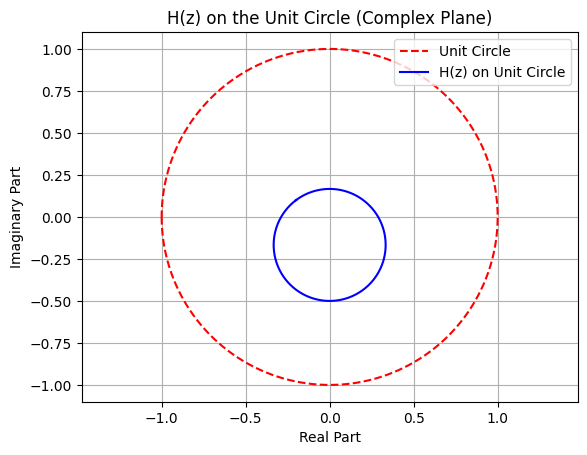

In [120]:
# Evaluate the transfer function H(z) on the unit circle, where z = exp(j*omega)
z = np.exp(1j * omega)
H = np.polyval(b, z) / np.polyval(a, z)

# Unit circle in the complex plane
unit_circle = np.exp(1j * omega)

# Plot the unit circle
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
# Plot H(z) on the complex plane
plt.plot(np.real(H), np.imag(H), 'b', label='H(z) on Unit Circle')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()

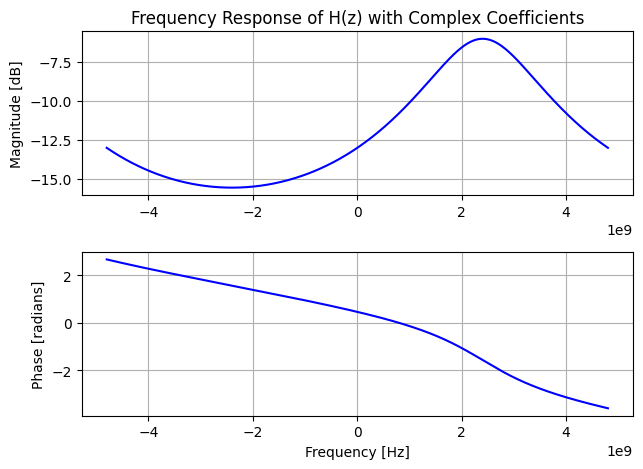

In [122]:
# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(frequencies, 20 * np.log10(np.abs(H)), 'b')
#plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.title('Frequency Response of H(z) with Complex Coefficients')
plt.ylabel('Magnitude [dB]')
plt.grid()

# Plot phase response
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(H))
plt.plot(frequencies, angles, 'b')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.tight_layout()
